In [5]:
from src import NirGB_BioCAL_DataModule, NirGB_BioCAL_Module, RGBNir_BioCAL_DataModule, RGBNir_BioCAL_Module, utils
import pytorch_lightning as pl
import torch 
from tqdm import tqdm
import torchvision
import pandas as pd 
from pathlib import Path
from skimage import io  
import matplotlib.pyplot as plt
import numpy as np
import collections
from skimage.io import imread

In [ ]:
dm = RGBNir_BioCAL_DataModule(batch_size=700, 
                           num_workers=6, 
                           pin_memory=True,
                           test_trans={
                                    "HorizontalFlip": {"p": 0.5},
                                    "VerticalFlip": {"p": 0.5},
                                    "Rotate": {"limit": 30, "p": 0.9},
                                    "RandomBrightnessContrast": {"brightness_limit": 0.1, "contrast_limit": 0.1, "p": 0.8},
                                })
dm.setup()

In [ ]:
ds = dm.ds_train

In [ ]:
alt_sample = ds[0]["img"][:,:,3:]

In [ ]:
ds[0]["lat"], ds[0]["lon"]

(45.70511627197271, 1.4246221780776998)

In [ ]:
alt_sample.mean()

382.2574462890625

In [ ]:
img = utils.get_patch_landcover(ds[20000]["observation_id"])
img = io.imread(img)
plt.imshow(img)
land = np.unique(img)
land

KeyError: 'observation_id'

In [ ]:
z = np.zeros(34)
f = lambda v: (img == v).sum() / 65536
v = [f(v) for v in land]
z[land] += v
z

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.13142395, 0.21578979, 0.47149658, 0.16435242, 0.        ,
       0.01693726, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
ds = dm.ds_test

In [ ]:
ds[0]["img"][0]

array([[114,  93,  76, 125],
       [116,  96,  77, 125],
       [102,  78,  58, 125],
       ...,
       [ 82,  55,  47, 117],
       [ 86,  60,  52, 117],
       [ 95,  65,  58, 117]], dtype=int16)

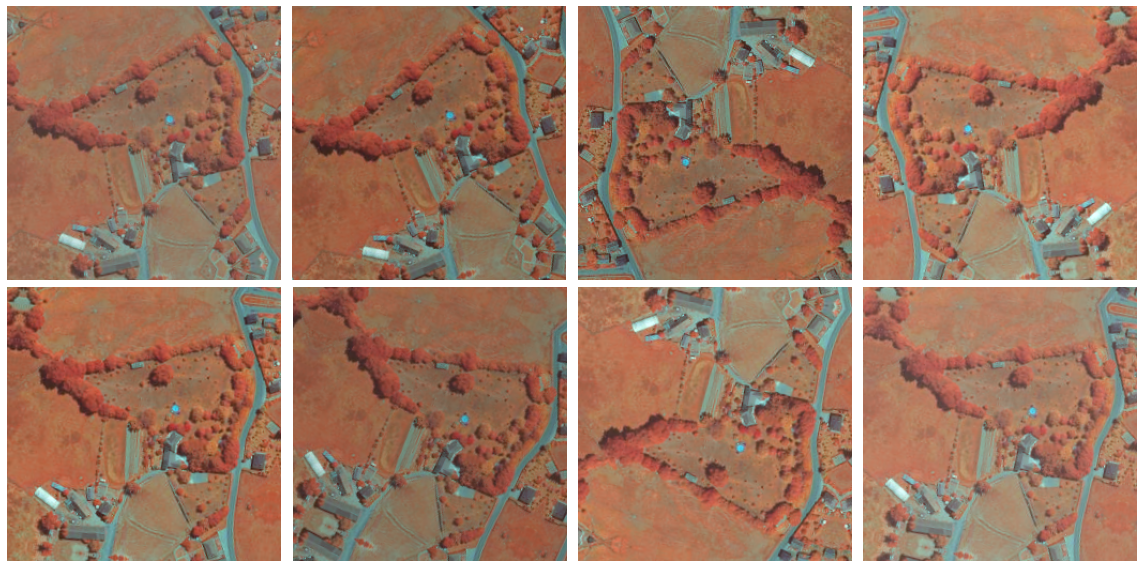

In [ ]:
def plot_imgs():
    r, c = 2, 4
    fig = plt.figure(figsize=(4*c, 4*r))
    ds = dm.ds_train
    ix = 0
    for _r in range(r):
        for _c in range(c):
            ax = plt.subplot(r, c, _r*c + _c + 1)
            sample = ds[ix]
            plt.axis("off")
            plt.imshow(sample["img"])
            #plt.title(sample["label"].item())
    plt.tight_layout()
    plt.show()
    
plot_imgs()